## Library Imports

In [1]:
from decouple import AutoConfig
import os
import pandas as pd
import matplotlib.pyplot as plt

## Functional Imports

In [2]:
from src.video.video_select import select_video
from src.video.video_insert import insert_multiple_video
from src.videos_manifest import list_files_in_directory

from src.comments.comment_select import select_comment
from src.comments.comment_insert import *
from src.comments.comment_parser import *

### Load Manifest Data

In [3]:
videos_manifest_df = pd.read_csv('./../data/raw/raw_videos_manifest.csv')
videos_manifest_filenames = videos_manifest_df["filename"].to_numpy()
video_raw_directory = ".././data/raw/videos/"

comments_manifest_df = pd.read_csv('./../data/raw/raw_comments_manifest.csv')
comments_manifest_filenames = comments_manifest_df["filename"].to_numpy()
comments_manifest_video_ids = comments_manifest_df["video_id"].to_numpy()
comments_raw_directory = ".././data/raw/comments-threads/"

## Configure PostgreSQL Environment Variables

In [4]:
config = AutoConfig(search_path='.')
db_params = {
    "host": "localhost",
    "port": config("DB_PORT"),
    "database": "YouTubeSentimentData",
    "user": config("DB_USER"),
    "password": config("DB_PASSWORD")
}

### Read Data Queries

In [5]:
all_videos = select_video(db_params)
all_comments = select_comment(db_params)

all_videos['columns']

Database connection is closed
Database connection is closed


['video_id',
 'publishedat',
 'channelid',
 'channeltitle',
 'title',
 'description',
 'tags',
 'duration',
 'dimension',
 'definition',
 'caption',
 'licensedcontent',
 'projection',
 'viewcount',
 'likecount',
 'favoritecount',
 'commentcount',
 'topiccategories']

### Insert Comment Query

In [ ]:
comment_threads_path = os.path.join(os.path.dirname(os.getcwd()), "data", "raw", "comment-threads")
file_paths = list_file_paths(comment_threads_path, comments_manifest_video_ids, comments_manifest_filenames)

insert_pages_of_comments(file_paths, db_params, return_all_comment_thread_data)

### Insert Videos Query

In [ ]:
insert_multiple_video(db_params, videos_manifest_filenames, video_raw_directory, return_all_video_section_data, parse_all_video_section_data)

### Convert Data to Pandas Dataframes

In [8]:
#all_videos_df = pd.DataFrame(all_videos)
#all_comments_df = pd.DataFrame(all_comments)

#all_videos

{'columns': ['video_id',
  'publishedat',
  'channelid',
  'channeltitle',
  'title',
  'description',
  'tags',
  'duration',
  'dimension',
  'definition',
  'caption',
  'licensedcontent',
  'projection',
  'viewcount',
  'likecount',
  'favoritecount',
  'commentcount',
  'topiccategories'],
 'data': [('bxIF9X9k2IE',
   datetime.datetime(2023, 9, 19, 12, 0, 34),
   'UC7cs8q-gJRlGwj4A8OmCmXg',
   'Alex The Analyst',
   'Data Analyst vs Data Scientist | Responsibilities, Salaries, Skills, Education',
   "Data Scientists and Data Analysts are some of the most sought after jobs in the data world. \n\nBoth share a lot of similar tools, but the type of work they do can be quite different - and the salaries reflect this! \n\nLet's look at some of the similarities between a Data Scientist and a Data Analyst and see which might be the best fit for you!\n\nCheck out Analyst Builder! https://www.analystbuilder.com/\n____________________________________________ \n\nSUBSCRIBE!\nDo you want to b

# Feature Engineering

### Add Upload Year Column

In [23]:
all_videos_df["uploadDate"] = pd.to_datetime(all_videos_df[1])
all_videos_df["Year"] = all_videos_df["uploadDate"].dt.year

# Plots

### Frequency of Year Upload Plot

<AxesSubplot: title={'center': 'Upload Frequency by Year'}, xlabel='Year', ylabel='Upload Frequency'>

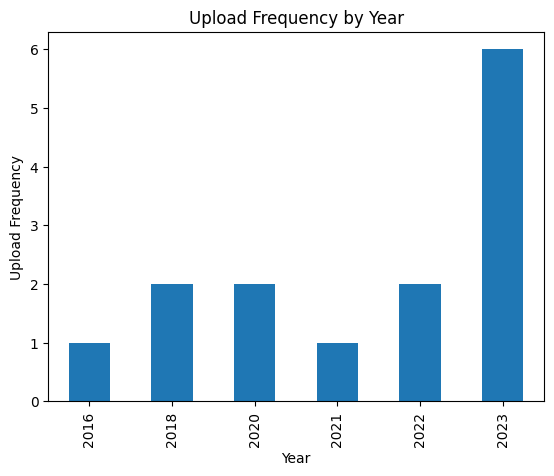

In [20]:
yearly_counts = all_videos_df["Year"].value_counts().sort_index()
yearly_counts.plot(kind="bar", xlabel="Year", ylabel="Upload Frequency", title="Upload Frequency by Year")

### Frequency of Comment Like Plot

<AxesSubplot: title={'center': 'Frequency of Count of Likes'}, xlabel='Count of Likes', ylabel='Frequency'>

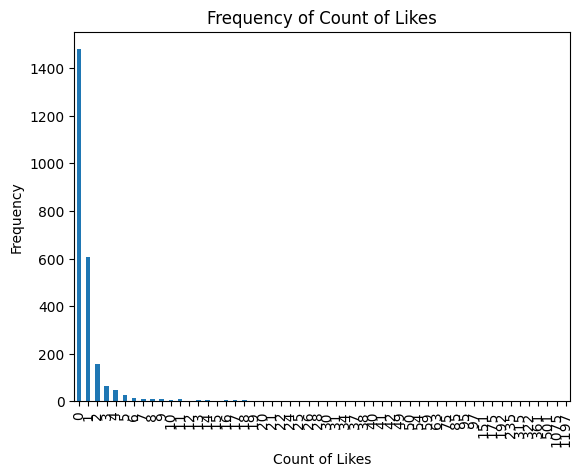

In [46]:
like_counts = all_comments_df[12].value_counts().sort_index()
like_counts.plot(kind="bar", xlabel="Count of Likes", ylabel="Frequency", title="Frequency of Count of Likes")

In [ ]:
# FROM POSTGRES DATABASE
#tags_corpus = create_tags_corpus(db_params, "../sql/video/video_read_tags.SQL")
#print(tags_corpus)